In [21]:
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl

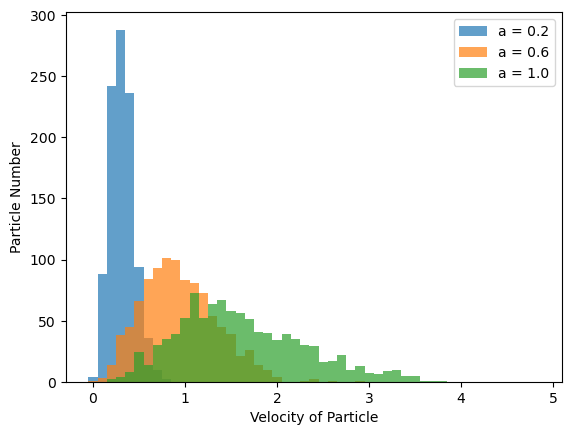

In [22]:
np.random.seed(0)

fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a)

pl.legend()

pl.xlabel('Velocity of Particle')
pl.ylabel('Particle Number')
pl.savefig('old-plot.svg', dpi=500)

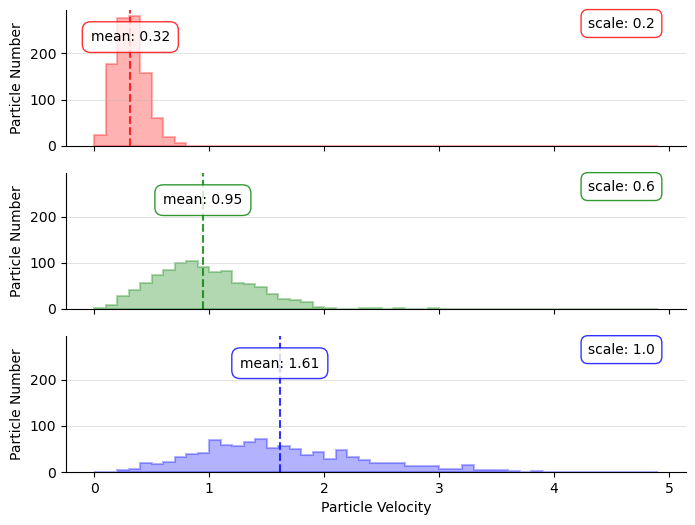

In [ ]:
np.random.seed(0)

fig, axes = pl.subplots(3, 1, figsize=(8, 6), sharex=True, sharey=True)
scales = [0.2, 0.6, 1.0]
colors = ['r', 'g', 'b']

for idx, (ax, a, color) in enumerate(zip(axes, scales, colors)):

    data = sp.stats.chi.rvs(df=3, scale=a, size=1000)
    ax.hist(data, bins=np.arange(0, 5, 0.1), 
            histtype='stepfilled', alpha=0.3, 
            color=color, edgecolor=color, linewidth=1.5)
    
    # mean line
    mean_val = np.mean(data)
    ax.axvline(mean_val, color=color, linestyle='--', linewidth=1.5, alpha=0.8,
               label='mean')
    y_pos = ax.get_ylim()[1] * 0.85
    ax.text(mean_val, y_pos, f'mean: {mean_val:.2f}', 
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', 
                     alpha=0.8, edgecolor=color))
    
    # label scale
    ax.text(0.95, 0.95, f'scale: {a}', 
            transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     alpha=0.8, edgecolor=color))
    
    # remove ink
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.5, linewidth=0.5)
    ax.grid(axis='x', alpha=0)
    
    # labels
    ax.set_ylabel('Particle Number')
axes[-1].set_xlabel('Particle Velocity')

pl.savefig('new-plot.svg', dpi=500)
pl.show()